### Importing all the necessary libraries

In [31]:
from pandas import ExcelWriter
from pandas import ExcelFile
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
line="{"

### Opening Excel file with all the data

In [32]:
df=pd.read_excel("speed-voltage.xlsx",sheet_name='Лист4')
df.head()

,Speed,Voltage
0,0.0,0
1,2.7,153
2,2.8,153
3,2.8,153
4,2.8,154


### Preparing test and train data

In [33]:
x=df["Voltage"].tolist()
y=df["Speed"].tolist()

X_train, X_test, y_train, y_test = train_test_split(
x[1:-1], y[1:-1], test_size=0.20, random_state=42)

### Obtaining linear function from practically got values

In [34]:
curve=np.polyfit(x,y,3)
poly=np.poly1d(curve)
print(poly)

           3             2
9.277e-07 x - 0.0003603 x + 0.05208 x + 0.001195


### Preparing data for the graph 

In [35]:
new_x = np.linspace(x[0], x[-1])
new_y = poly(new_x)

### R squared of cubic function

In [36]:
r2 = r2_score(y_test, poly(X_test))
print(r2)

0.9743877183000348


### Calculating RSS of cubic function

In [37]:
rss=0
for i in range(len(y_test)):
    rss+=(y_test[i]-poly(X_test[i]))**2
rss

0.15002292369716136

### Plotting our function

(-1.0, 232.0)

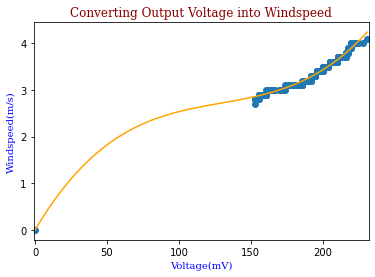

In [38]:
plt.plot(x, y, "o", new_x, new_y,'orange')
plt.title("Converting Output Voltage into Windspeed",fontdict={'family':'serif','color':'darkred'})
plt.xlabel("Voltage(mV)",fontdict={'family':'serif','color':'blue'})
plt.ylabel("Windspeed(m/s)",fontdict={'family':'serif','color':'blue'})
plt.xlim([x[0]-1, x[-1] + 1 ])

In [39]:
rss=0

for i in range(len(y_test)):
    rss+=(abs((y_test[i])-poly(X_test[i]))/y_test[i])
rss

0.7996186447088455

In [43]:
poly(160) 

2.90855726182141

### Data for WolframAlpha

In [41]:
for i in range(len(X_train)):
    line+="{"+str(X_train[i])+','+str(y_train[i])+'}'+','
line

'{{190,3.2},{186,3.1},{193,3.3},{171,3.0},{184,3.1},{206,3.6},{224,4.0},{210,3.6},{216,3.8},{198,3.4},{202,3.5},{189,3.2},{219,3.9},{164,3.0},{196,3.4},{155,2.8},{211,3.7},{159,2.9},{158,2.9},{213,3.7},{163,3.0},{188,3.2},{200,3.5},{210,3.6},{200,3.5},{220,4.0},{202,3.5},{194,3.3},{198,3.4},{222,4.0},{225,4.0},{165,3.0},{191,3.2},{157,2.9},{224,4.0},{187,3.2},{157,2.9},{209,3.6},{184,3.1},{177,3.1},{209,3.6},{194,3.3},{170,3.0},{185,3.1},{156,2.9},{156,2.8},{205,3.6},{203,3.5},{186,3.1},{166,3.0},{209,3.6},{160,2.9},{157,2.9},{163,3.0},{210,3.6},{217,3.8},{165,3.0},{190,3.2},{210,3.6},{166,3.0},{159,2.9},{220,3.9},{196,3.4},{209,3.6},{196,3.4},{191,3.2},{195,3.3},{183,3.1},{216,3.7},{193,3.3},{212,3.7},{221,4.0},{205,3.6},{205,3.6},{220,4.0},{194,3.3},{200,3.5},{192,3.2},{161,2.9},{202,3.5},{199,3.4},{198,3.4},{189,3.2},{199,3.4},{190,3.2},{218,3.9},{217,3.8},{213,3.7},{200,3.4},{200,3.4},{153,2.8},{190,3.2},{195,3.3},{200,3.4},{190,3.2},{206,3.6},{214,3.7},{191,3.2},{173,3.0},{159,2.9